In [146]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [147]:
import numpy as np
import pandas as pd

In [148]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [149]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Numeric, Text, Float

In [150]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [151]:
# reflect an existing database into a new model

# reflect the tables

In [152]:
Base = automap_base()

In [153]:
Base.prepare(engine, reflect=True)

In [154]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [155]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [156]:
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [157]:
# Save references to each table
Station = Base.classes.station
Measurements = Base.classes.measurement

In [158]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [159]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [160]:
last_date = session.query(Measurements.date).order_by(Measurements.date.desc()).first()
print(last_date)

('2017-08-23',)


In [161]:
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_year)

2016-08-23


In [162]:
rain = session.query(Measurements.date, Measurements.prcp).\
    filter(Measurements.date > last_year).order_by(Measurements.date).all()

In [163]:
rain_df = pd.DataFrame(rain)

rain_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [164]:
rain_df.set_index('date').head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


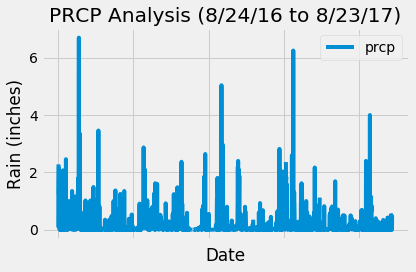

In [165]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain_df.plot('date', 'prcp')
plt.xlabel('Date')
plt.ylabel('Rain (inches)')
plt.title('PRCP Analysis (8/24/16 to 8/23/17)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [166]:
rain_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [167]:
# Design a query to show how many stations are available in this dataset?
locations = session.query(Measurements).group_by(Measurements.station).count()
print('There are {} available stations in this dataset.'.format(locations))

There are 9 available stations in this dataset.


In [168]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
pop_station = session.query(Measurements.station, func.count(Measurements.tobs)).\
    group_by(Measurements.station).\
    order_by(func.count(Measurements.tobs).desc()).all()
most_pop = pop_station[0][0]
print('The most active station was', most_pop, 'with', pop_station[0][1], 'weather observations')

print('These are all of the stations in descending order with their number of observations:')
for station, count in pop_station:
    print('Station', station, 'had', count, 'weather observations')

The most active station was USC00519281 with 2772 weather observations
These are all of the stations in descending order with their number of observations:
Station USC00519281 had 2772 weather observations
Station USC00519397 had 2724 weather observations
Station USC00513117 had 2709 weather observations
Station USC00519523 had 2669 weather observations
Station USC00516128 had 2612 weather observations
Station USC00514830 had 2202 weather observations
Station USC00511918 had 1979 weather observations
Station USC00517948 had 1372 weather observations
Station USC00518838 had 511 weather observations


In [169]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp = session.query(Measurements.station, Measurements.date, Measurements.tobs).\
    filter(Measurements.station == most_pop).\
    filter(Measurements.date > last_year).\
    order_by(Measurements.date).all()

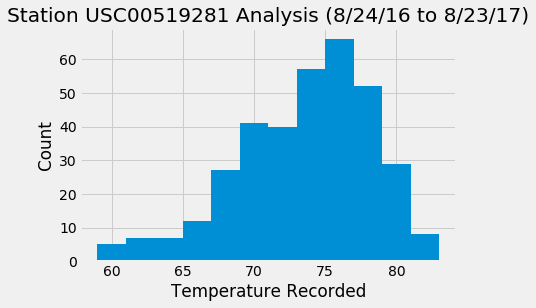

In [170]:
temp_df = pd.DataFrame(temp)
plt.hist(temp_df['tobs'], 12)
plt.xlabel('Temperature Recorded')
plt.ylabel('Count')
plt.title('Station '+most_pop+' Analysis (8/24/16 to 8/23/17)')

plt.show()

In [171]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
newtemp_df = temp_df[temp_df['station'] == most_pop]
max_t = newtemp_df['tobs'].max()
min_t = newtemp_df['tobs'].min()
avg_t = newtemp_df['tobs'].mean()

print('Here are the max, min, and avg temps from the most popular station:')
print('max: ', max_t)
print('min: ', min_t)
print('avg: ', round(avg_t, 2))

Here are the max, min, and avg temps from the most popular station:
max:  83.0
min:  59.0
avg:  73.1


## Bonus Challenge Assignment

In [172]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)).\
        filter(Measurements.date >= start_date).filter(Measurements.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [173]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_start = dt.date(2018, 4, 1)
trip_end = dt.date(2018, 4, 15)
last_year = dt.timedelta(days=365)
data = (calc_temps((trip_start - last_year), (trip_end - last_year)))
print(data)

[(67.0, 74.47368421052632, 82.0)]


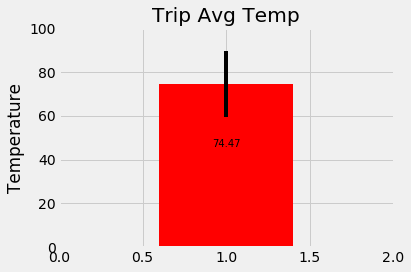

In [174]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
avg_temp = data[0][1]
min_temp = data[0][0]
max_temp = data[0][2]
p2p = max_temp - min_temp

fig, ax = plt.subplots()
bar_chart = ax.bar(1, avg_temp, color='red', yerr=p2p)
ax.set_ylabel('Temperature')
ax.set_title('Trip Avg Temp')

def autolabels(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., .6*h, '%.2f' % float(h),\
               ha='center', va='bottom', fontsize=10)
        
autolabels(bar_chart)
plt.ylim(0,100)
plt.xlim(0,2)
fig.tight_layout()
plt.show()

In [175]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
lastyear_start = trip_start - last_year
lastyear_end = trip_end - last_year

vacation_data = session.query(Measurements.station, Measurements.date, Measurements.prcp, Measurements.tobs).\
    filter(Measurements.date >= lastyear_start).\
    filter(Measurements.date <= lastyear_end).\
    order_by(Measurements.station).all()
vacation_data_df = pd.DataFrame(vacation_data)
rain_per_station = pd.pivot_table(vacation_data_df, index=['station'], values=['prcp'], aggfunc=sum)
rain_per_station.sort_values('prcp', ascending=False)

,prcp
station,
USC00516128,5.75
USC00519281,4.14
USC00513117,1.64
USC00514830,0.90
USC00519523,0.36
USC00519397,0.27
USC00517948,0.00


In [176]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurements.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]